# **Line Charts**


Estimated time needed: **30** minutes


In this lab, we will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab we will be performing the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Download and load the dataset


In [3]:
url =  'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(url)

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Display the first few rows to understand the structure of the data


In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


| Age                | ConvertedCompYearly_numeric   |
|:-------------------|:------------------------------|
| Under 18 years old | 7626.5                        |
| 18-24 years old    | 25000                         |
| 25-34 years old    | 59825                         |
| 35-44 years old    | 84796                         |
| 45-54 years old    | 99099                         |
| 55-64 years old    | 109691                        |
| 65 years or older  | 106000                        |


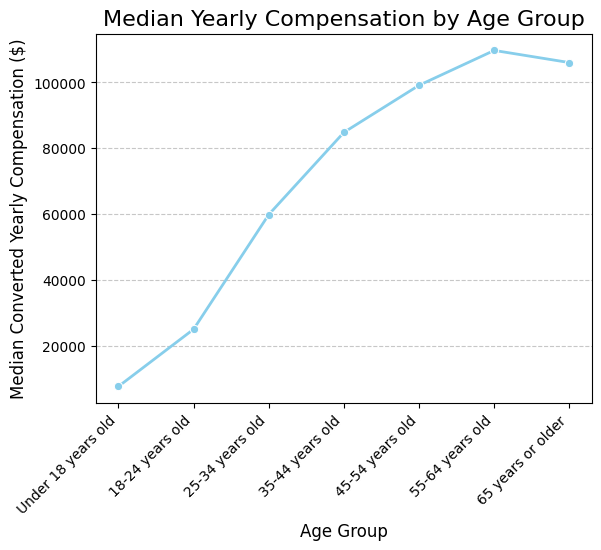

In [31]:
df['ConvertedCompYearly_numeric'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
age_order_for_plot = [
        'Under 18 years old',
        '18-24 years old',
        '25-34 years old',
        '35-44 years old',
        '45-54 years old',
        '55-64 years old',
        '65 years or older'
    ]
df['Age'] = pd.Categorical(df['Age'], categories=age_order_for_plot, ordered=True)
plot_df = df.dropna(subset=['Age', 'ConvertedCompYearly_numeric']).copy()
median_comp_by_age = plot_df.groupby('Age')['ConvertedCompYearly_numeric'].median().reset_index()
print(median_comp_by_age.to_markdown(index=False, numalign="left", stralign="left"))
sns.lineplot(
            x='Age',
            y='ConvertedCompYearly_numeric',
            data=median_comp_by_age,
            marker='o',
            color='skyblue',
            linewidth=2 
        )

plt.title('Median Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Converted Yearly Compensation ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

### Insight
- There's a strong and consistent positive correlation between age and median yearly compensation. As developers get older, their earnings generally increase.
- The most substantial increases in median compensation occur from "Under 18 years old" up to the "45-54 years old" and "55-64 years old" age groups. This reflects career progression, accumulation of experience, and potentially moving into more senior or specialized roles.
- The median compensation appears to peak around the "55-64 years old" age group and then slightly declines or plateaus for the "65 years or older" group. This could be due to various factors, such as shift towards part-time work, or retirement.

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


| Age             | ConvertedCompYearly_numeric   |
|:----------------|:------------------------------|
| 25-34 years old | 59825                         |
| 35-44 years old | 84796                         |


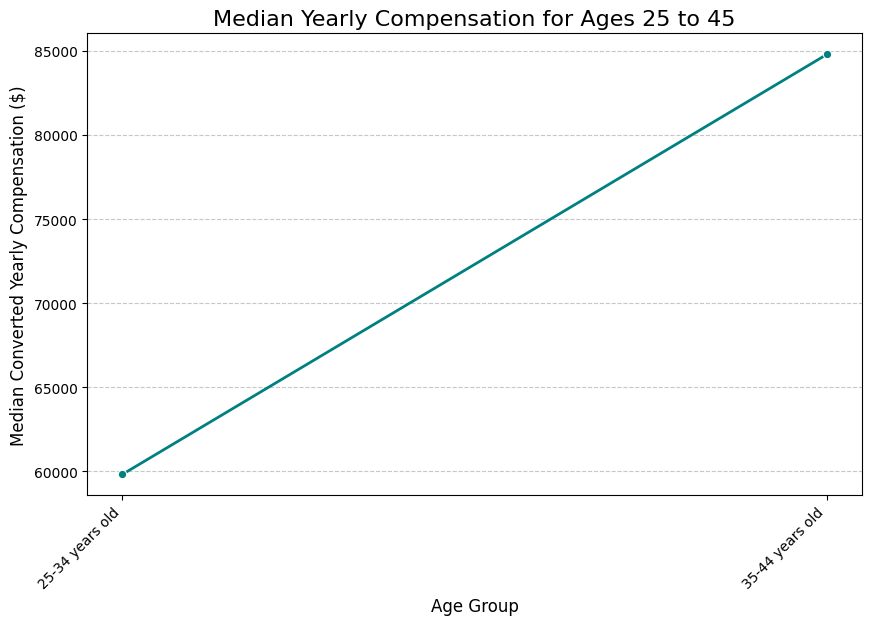

In [32]:
df['ConvertedCompYearly_numeric'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
target_age_groups = [ #as we don't have any age group in the data however we are going to target two age range
        '25-34 years old',
        '35-44 years old',
]
plot_df = df[df['Age'].isin(target_age_groups)].copy()
plot_df['Age'] = pd.Categorical(plot_df['Age'], categories=target_age_groups, ordered=True)
plot_df = plot_df.dropna(subset=['Age', 'ConvertedCompYearly_numeric']).copy()
median_comp_by_age_filtered = plot_df.groupby('Age')['ConvertedCompYearly_numeric'].median().reset_index()
print(median_comp_by_age_filtered.to_markdown(index=False, numalign="left", stralign="left"))
plt.figure(figsize=(10, 6)) 
sns.lineplot(
            x='Age',
            y='ConvertedCompYearly_numeric',
            data=median_comp_by_age_filtered,
            marker='o', 
            color='teal', 
            linewidth=2 
        )
plt.title('Median Yearly Compensation for Ages 25 to 45', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Converted Yearly Compensation ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insight
The line chart effectively highlights that the age range of 25 to 45 years old is a period of significant yearly compensation growth for developers. Salaries increase substantially as individuals transition from the 25-34 age to the 35-44 age, underscoring the financial benefits of accumulated experience and career advancement during these crucial professional years.

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


| YearsCodePro_Binned   | JobSatPoints_6_numeric   |
|:----------------------|:-------------------------|
| Less than 1 year      | 10                       |
| 1-10 years            | 20                       |
| 11-20 years           | 20                       |
| 21-30 years           | 20                       |
| 31-40 years           | 20                       |
| 41-50 years           | 20                       |
| More than 50 years    | 20                       |


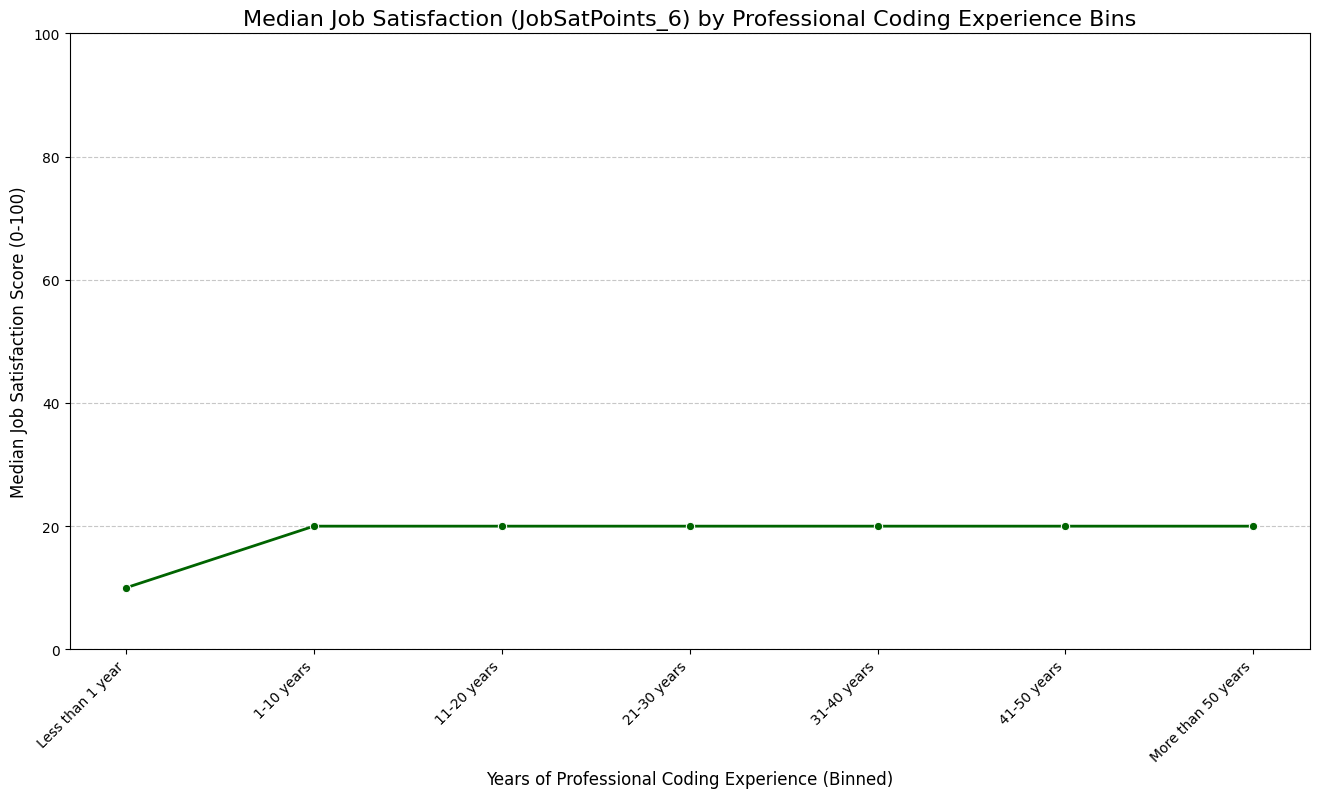

In [29]:
def map_to_new_experience_bins(years_str):
    if pd.isna(years_str) or str(years_str).strip() == '' or str(years_str).strip().lower() == 'na':
        return np.nan
        
    years_str = str(years_str).strip()

    if years_str == 'Less than 1 year':
        return 'Less than 1 year'
    elif years_str == 'More than 50 years':
        return 'More than 50 years'
    else:
        try:
            years = int(years_str)
            if years < 1: return 'Less than 1 year' 
            elif 1 <= years <= 10: return '1-10 years'
            elif 11 <= years <= 20: return '11-20 years'
            elif 21 <= years <= 30: return '21-30 years'
            elif 31 <= years <= 40: return '31-40 years'
            elif 41 <= years <= 50: return '41-50 years'
            else: return 'More than 50 years' 
        except ValueError:
            return np.nan 

df['YearsCodePro_Binned'] = df['YearsCodePro'].apply(map_to_new_experience_bins)
new_bin_order = [
        'Less than 1 year',
        '1-10 years',
        '11-20 years',
        '21-30 years',        
        '31-40 years',
        '41-50 years',
        'More than 50 years'
    ]
df['YearsCodePro_Binned'] = pd.Categorical(df['YearsCodePro_Binned'], categories=new_bin_order, ordered=True)
df['JobSatPoints_6_numeric'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
plot_df = df.dropna(subset=['YearsCodePro_Binned', 'JobSatPoints_6_numeric']).copy()
median_jobsat_by_binned_experience = plot_df.groupby('YearsCodePro_Binned')['JobSatPoints_6_numeric'].median().reset_index()
median_jobsat_by_binned_experience = median_jobsat_by_binned_experience.sort_values(by='YearsCodePro_Binned')
print(median_jobsat_by_binned_experience.to_markdown(index=False, numalign="left", stralign="left"))
plt.figure(figsize=(16, 8)) 
sns.lineplot(
            x='YearsCodePro_Binned', 
            y='JobSatPoints_6_numeric',
            data=median_jobsat_by_binned_experience,
            marker='o', 
            color='darkgreen', 
            linewidth=2 
        )

plt.title('Median Job Satisfaction (JobSatPoints_6) by Professional Coding Experience Bins', fontsize=16)
plt.xlabel('Years of Professional Coding Experience (Binned)', fontsize=12)
plt.ylabel('Median Job Satisfaction Score (0-100)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100) # JobSatPoints_6 is 0-100
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


### Insight
- Median job satisfaction starts at a lower point for developers with "Less than 1 year" of experience at around 10.
- After the initial rise, median job satisfaction appears to plateau and remain consistently flat across all subsequent experience at 20.

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.



Median Converted Yearly Compensation by Professional Coding Experience Bins:
| YearsCodePro_Binned   | ConvertedCompYearly_numeric   |
|:----------------------|:------------------------------|
| Less than 1 year      | 21289                         |
| 1-10 years            | 53703                         |
| 11-20 years           | 88862                         |
| 21-30 years           | 106694                        |
| 31-40 years           | 110936                        |
| 41-50 years           | 127388                        |
| More than 50 years    | 160000                        |


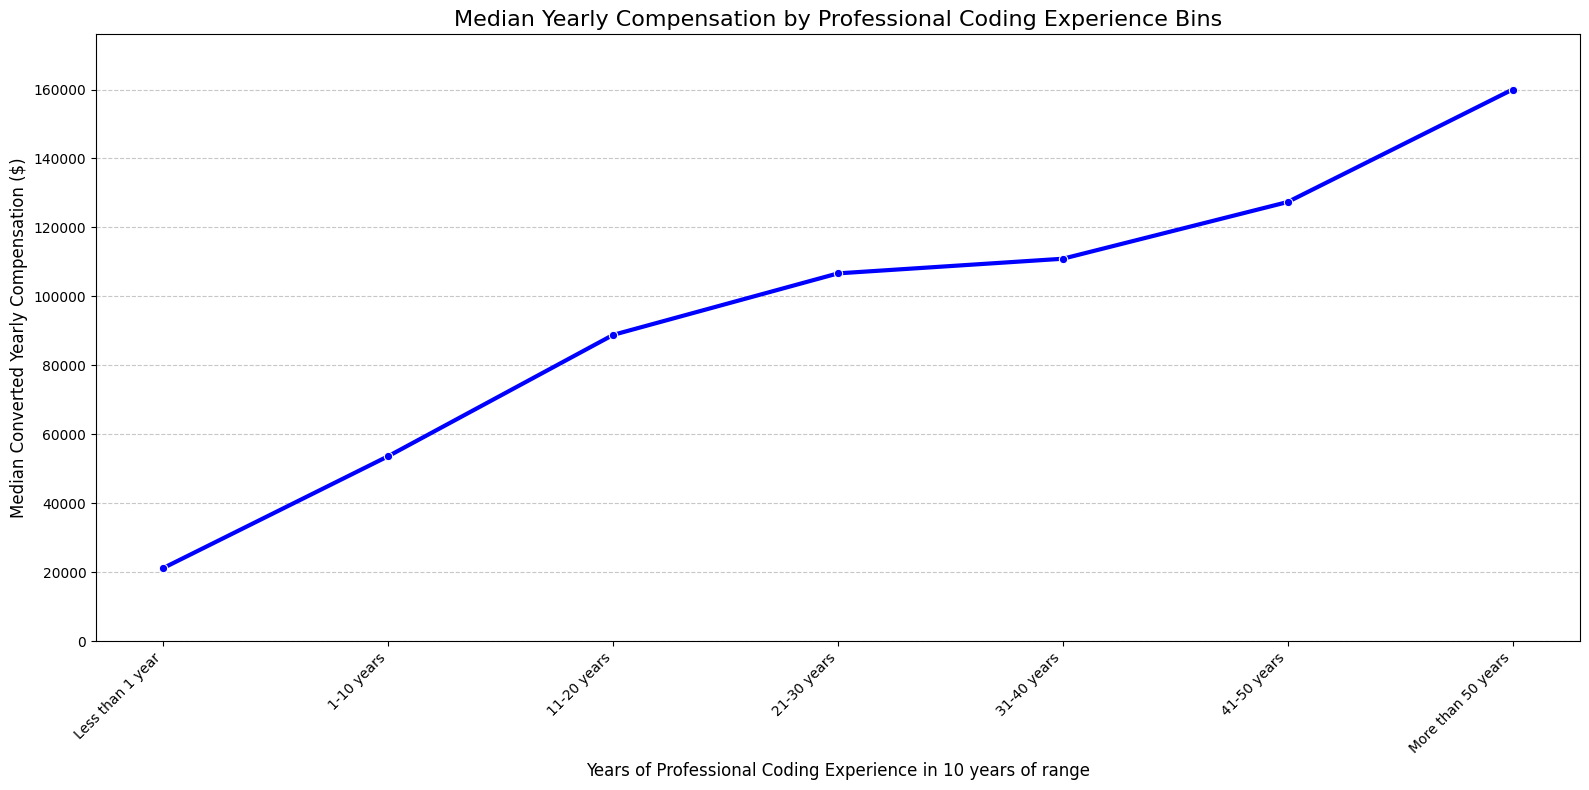

In [28]:
df['ConvertedCompYearly_numeric'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
def map_to_custom_experience_bins(years_str):
    if pd.isna(years_str) or str(years_str).strip() == '' or str(years_str).strip().lower() == 'na':
        return np.nan

    years_str = str(years_str).strip()

    if years_str == 'Less than 1 year':
        return 'Less than 1 year'
    elif years_str == 'More than 50 years':
        return 'More than 50 years'
    else:
        try:
            years = int(years_str)
            if years < 1: return 'Less than 1 year' 
            elif 1 <= years <= 10: return '1-10 years'
            elif 11 <= years <= 20: return '11-20 years'
            elif 21 <= years <= 30: return '21-30 years'
            elif 31 <= years <= 40: return '31-40 years'
            elif 41 <= years <= 50: return '41-50 years'
            else: return 'More than 50 years' 
        except ValueError:
            return np.nan

df['YearsCodePro_Binned'] = df['YearsCodePro'].apply(map_to_custom_experience_bins)
new_bin_order = [
    'Less than 1 year',
        '1-10 years',
        '11-20 years',
        '21-30 years',        
        '31-40 years',
        '41-50 years',
        'More than 50 years'
]
df['YearsCodePro_Binned'] = pd.Categorical(df['YearsCodePro_Binned'], categories=new_bin_order, ordered=True)
plot_df = df.dropna(subset=['YearsCodePro_Binned', 'ConvertedCompYearly_numeric']).copy()
if not plot_df.empty:
    median_comp_by_binned_experience = plot_df.groupby('YearsCodePro_Binned')['ConvertedCompYearly_numeric'].median().reset_index()
    median_comp_by_binned_experience = median_comp_by_binned_experience.sort_values(by='YearsCodePro_Binned')

    print("\nMedian Converted Yearly Compensation by Professional Coding Experience Bins:")
    print(median_comp_by_binned_experience.to_markdown(index=False, numalign="left", stralign="left"))
    plt.figure(figsize=(16, 8))

    sns.lineplot(
        x='YearsCodePro_Binned', 
        y='ConvertedCompYearly_numeric',
        data=median_comp_by_binned_experience, 
        marker='o', 
        color='blue', 
        linewidth=3 
    )

    plt.title('Median Yearly Compensation by Professional Coding Experience Bins', fontsize=16)
    plt.xlabel('Years of Professional Coding Experience in 10 years of range', fontsize=12)
    plt.ylabel('Median Converted Yearly Compensation ($)', fontsize=12)

    plt.xticks(rotation=45, ha='right') 
    plt.ticklabel_format(style='plain', axis='y') 
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    max_y_val = median_comp_by_binned_experience['ConvertedCompYearly_numeric'].max()
    plt.ylim(0, max_y_val * 1.1)
    plt.tight_layout()
    plt.show()

### Insight
- Consistent Compensation Growth: There is a clear and consistent upward trend in median yearly compensation as developers gain more professional coding experience.
- Significant Early Career Gains: Compensation sees substantial increases in the early stages of a career, particularly from "Less than 1 year" up to "11-20 years" of experience.
- Continued Growth in Mid-to-Late Career: The median compensation continues to rise steadily through the "21-30 years," "31-40 years," and "41-50 years" experience bins, indicating that experience continues to be rewarded.
- Peak for Highly Experienced: The highest median compensation is observed for those with "More than 50 years" of professional coding experience, suggesting that long-term dedication and expertise are highly valued.

##### 2.Line Chart of Job Satisfaction (`JobSat`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSat`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


| YearsCodePro_Binned   | JobSat_numeric   |
|:----------------------|:-----------------|
| Less than 1 year      | 7                |
| 1-10 years            | 7                |
| 11-20 years           | 8                |
| 21-30 years           | 8                |
| 31-40 years           | 8                |
| 41-50 years           | 8                |
| More than 50 years    | 9                |


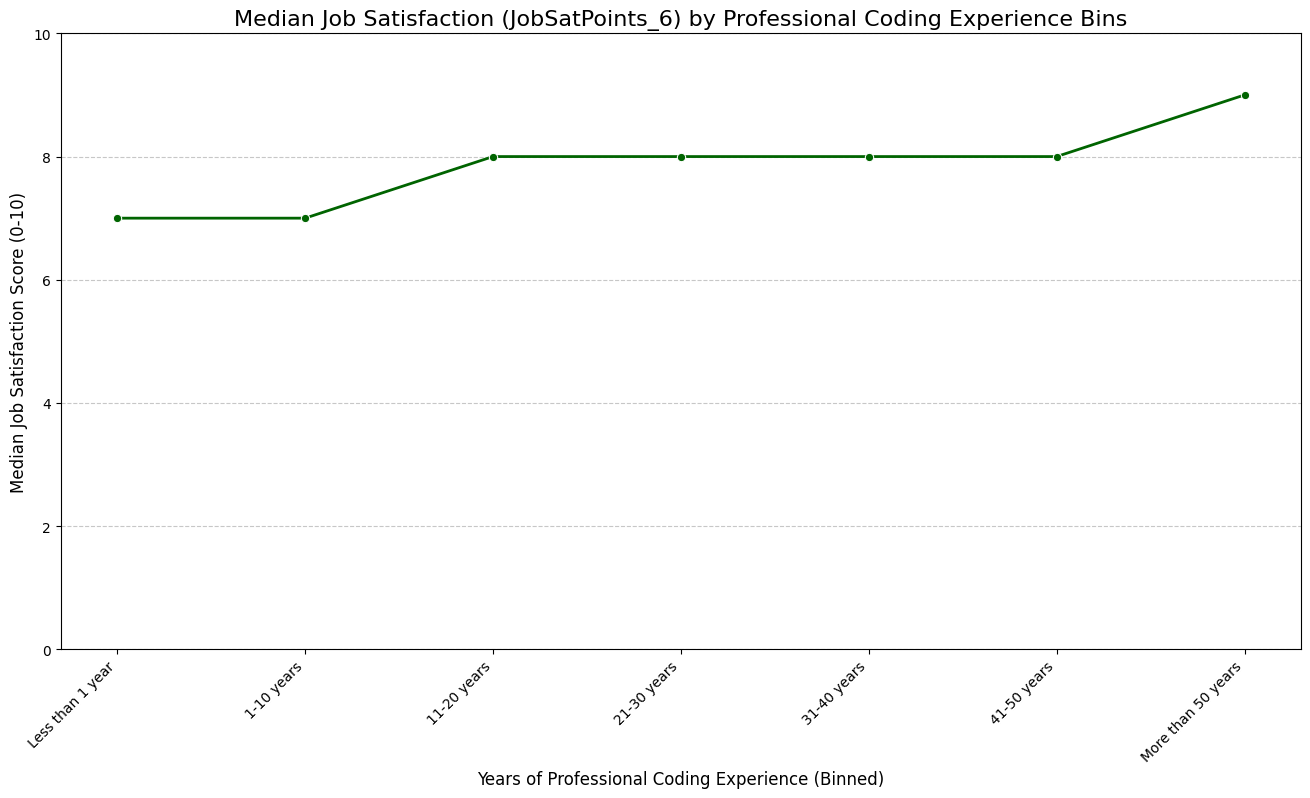

In [33]:
def map_to_new_experience_bins(years_str):
    if pd.isna(years_str) or str(years_str).strip() == '' or str(years_str).strip().lower() == 'na':
        return np.nan
        
    years_str = str(years_str).strip()

    if years_str == 'Less than 1 year':
        return 'Less than 1 year'
    elif years_str == 'More than 50 years':
        return 'More than 50 years'
    else:
        try:
            years = int(years_str)
            if years < 1: return 'Less than 1 year' 
            elif 1 <= years <= 10: return '1-10 years'
            elif 11 <= years <= 20: return '11-20 years'
            elif 21 <= years <= 30: return '21-30 years'
            elif 31 <= years <= 40: return '31-40 years'
            elif 41 <= years <= 50: return '41-50 years'
            else: return 'More than 50 years' 
        except ValueError:
            return np.nan 

df['YearsCodePro_Binned'] = df['YearsCodePro'].apply(map_to_new_experience_bins)
new_bin_order = [
        'Less than 1 year',
        '1-10 years',
        '11-20 years',
        '21-30 years',        
        '31-40 years',
        '41-50 years',
        'More than 50 years'
    ]
df['YearsCodePro_Binned'] = pd.Categorical(df['YearsCodePro_Binned'], categories=new_bin_order, ordered=True)
df['JobSat_numeric'] = pd.to_numeric(df['JobSat'], errors='coerce')
plot_df = df.dropna(subset=['YearsCodePro_Binned', 'JobSat_numeric']).copy()
median_jobsat_by_binned_experience = plot_df.groupby('YearsCodePro_Binned')['JobSat_numeric'].median().reset_index()
median_jobsat_by_binned_experience = median_jobsat_by_binned_experience.sort_values(by='YearsCodePro_Binned')
print(median_jobsat_by_binned_experience.to_markdown(index=False, numalign="left", stralign="left"))
plt.figure(figsize=(16, 8)) 
sns.lineplot(
            x='YearsCodePro_Binned', 
            y='JobSat_numeric',
            data=median_jobsat_by_binned_experience,
            marker='o', 
            color='darkgreen', 
            linewidth=2 
        )

plt.title('Median Job Satisfaction (JobSatPoints_6) by Professional Coding Experience Bins', fontsize=16)
plt.xlabel('Years of Professional Coding Experience (Binned)', fontsize=12)
plt.ylabel('Median Job Satisfaction Score (0-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10) # JobSat is 0-10
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


### Insight
- Median job satisfaction starts at a consistent level (around 7 out of 10) for developers with "Less than 1 year" and "1-10 years" of experience.

- There's a noticeable increase in median job satisfaction for the "11-20 years" experience, rising to 8 out of 10.

- After this increase, median job satisfaction remains remarkably stable at 8 out of 10 for a very long period, spanning from "11-20 years" through "41-50 years" of professional coding experience.

- For the "More than 50 years" experience, there's a further increase in median job satisfaction, reaching approximately 9 out of 10.

### Summary


In this lab, we explored essential data visualization techniques with a focus on analyzing trends using line charts. We learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, we gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


#### This work is done by Bimal Upadhaya © 2025.
